# Plotting Functions

In [1]:
from pathlib import Path
import sys
sys.path.append('../src/rate')
from constants import SCORED_DIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from treatment_effects import treatment_effects_pipeline
from utils_plotting import create_latex_tables_from_samples, plot_scores, naive_vs_RATE, rewrite_bias, synthetic_subplots, att_atu
from utils import load_dataset_from_json, write_to_json
import warnings
warnings.filterwarnings('ignore')

2025-01-10 18:49:37,699 - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
2025-01-10 18:49:37,700 - INFO - NumExpr defaulting to 16 threads.


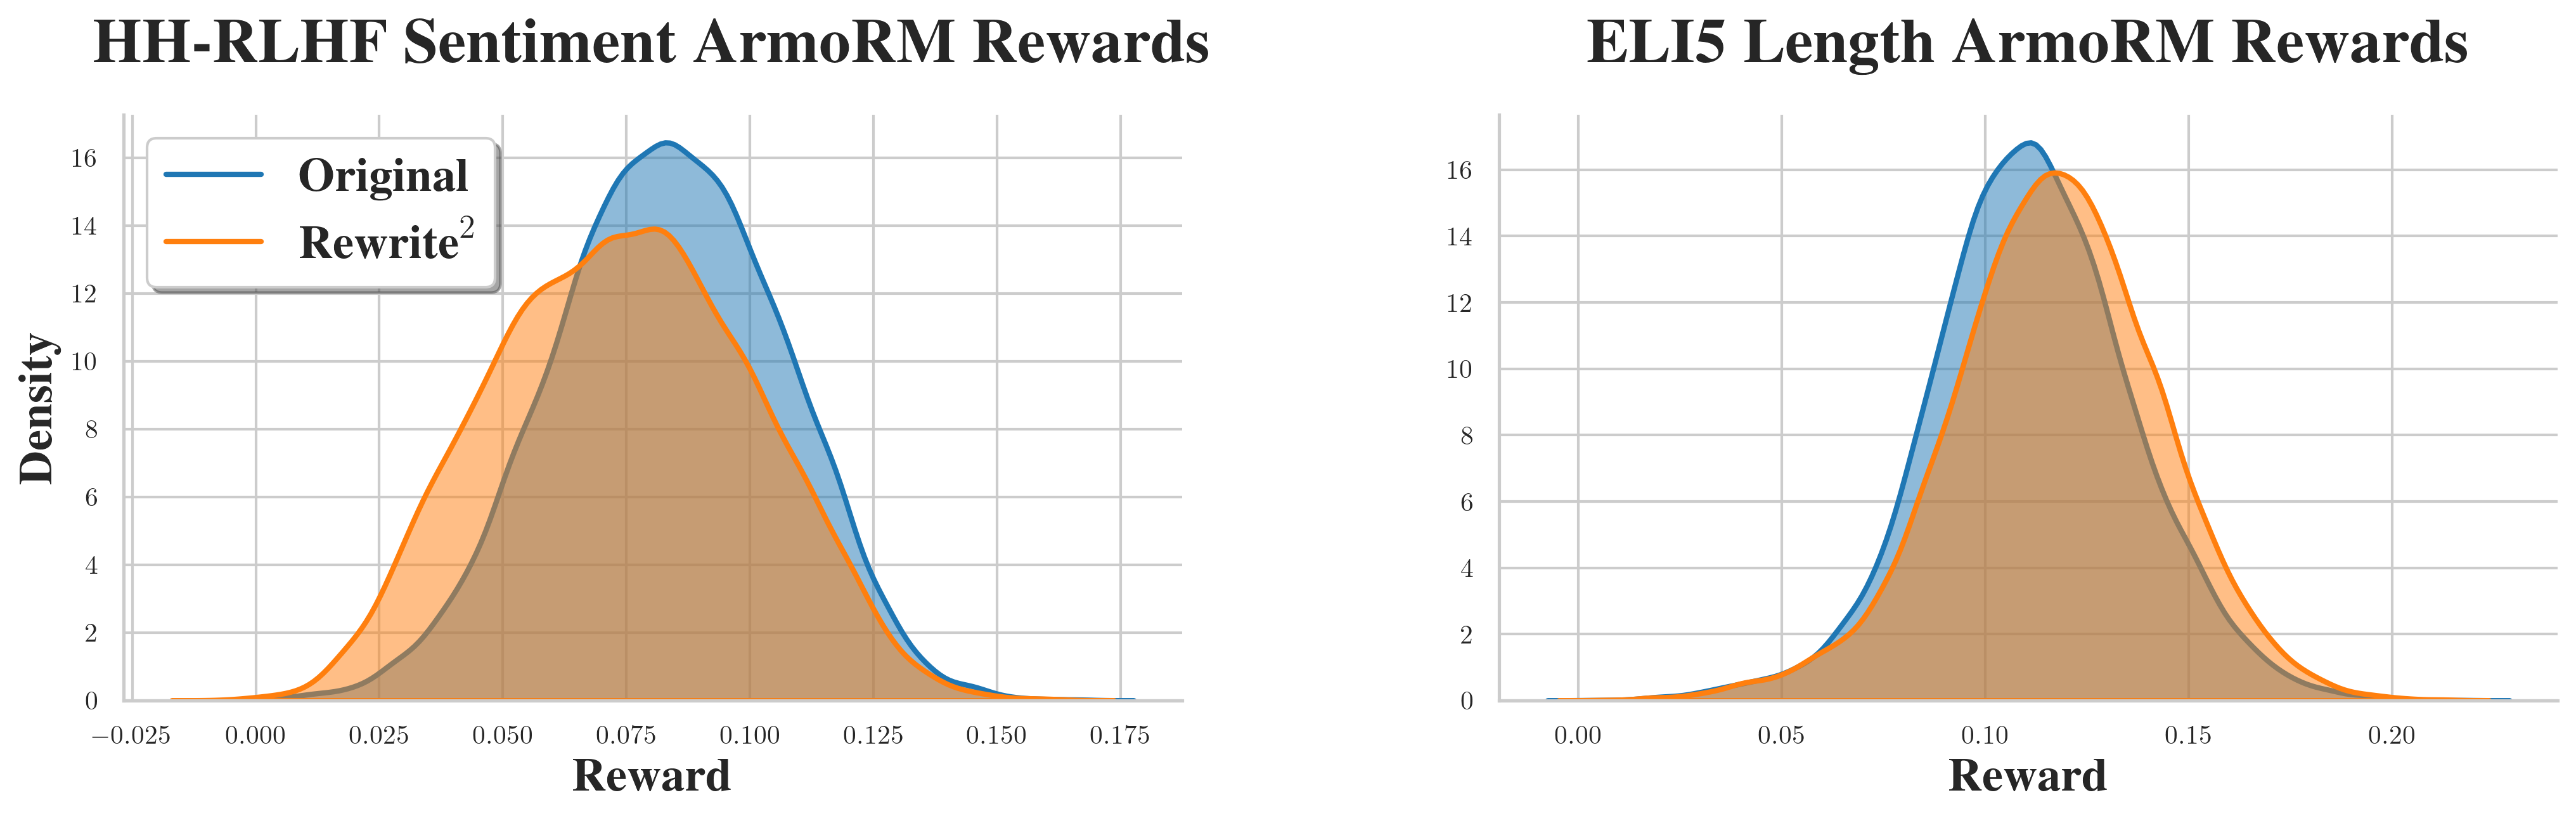

In [2]:
hh_rlhf_template = {
        "dataset_name": "HH-RLHF",
        "concept": "Sentiment",
        "score": "ArmoRM",
        "reward_key": "RLHFlow/ArmoRM-Llama3-8B-v0.1",
        "dataset_filename": "hh_rlhf_sentiment_scored_complete.jsonl"
    }
eli5_template = {
        "dataset_name": "ELI5",
        "concept": "Length",
        "score": "ArmoRM",
        "reward_key": "ArmoRM",
        "dataset_filename": "eli5_length_complete_scored_20240919_170111.jsonl"
    }

templates = [hh_rlhf_template, eli5_template]
plot_scores(templates, SCORED_DIR)

In [3]:
config = load_dataset_from_json(Path("config_plotting.jsonl"))

# make into list of dictionaries
experiment_templates = [value for value in config.values()]

In [4]:
# save all the data
effects_data = []
for effects_template in experiment_templates:
    dataset_filename = effects_template["dataset_filename"]
    dataset_filename = Path(dataset_filename)
    dataset = load_dataset_from_json(SCORED_DIR / "complete" / dataset_filename)
    effects = treatment_effects_pipeline(dataset, **effects_template)
    effects_data.append(effects)

2025-01-10 18:49:41,119 - INFO - Number of w=1 examples: 12612
2025-01-10 18:49:41,120 - INFO - Number of w=0 examples: 12389
2025-01-10 18:49:41,133 - INFO - Treatment effects: {   'ATE_rewritten_rewrite': -0.0008267120345947232,
    'ATE_rewritten_rewrite_stderr': 0.00023309842563074148,
    'ATE_single_rewrite': 0.001494292597008548,
    'ATE_single_rewrite_stderr': 9.391197021986063e-05,
    'ATT_rewritten_rewrite': 0.0005248629986794456,
    'ATT_rewritten_rewrite_stderr': 0.0003215778627196273,
    'ATT_single_rewrite': -0.002639021079802975,
    'ATT_single_rewrite_stderr': 0.00010186583527184842,
    'ATU_rewritten_rewrite': -0.002202615200278285,
    'ATU_rewritten_rewrite_stderr': 0.0003354240091955926,
    'ATU_single_rewrite': 0.00570200525274725,
    'ATU_single_rewrite_stderr': 0.00014943376492016524,
    'Y0_count': 12389,
    'Y1_count': 12612,
    'naive_effect': 0.008119381960269595,
    'naive_effect_stderr': 0.0003128414498368806,
    'reward_std': 0.024745076474063

1.446339510263498
1.446339510263498
1.2683721907249241
1.2683721907249241
2.7875573425759157
2.7875573425759157
2.435557870420811
2.435557870420811
1.525037238845333
1.525037238845333
1.1187855739506742
1.1187855739506742
1.099524485115019
1.099524485115019
2.081159884675398
2.081159884675398
1.825463470190845
1.825463470190845
1.1002583842368048
1.1002583842368048
0.02474507647406317
0.02474507647406317
0.015310110114614885
0.015310110114614885
0.03761325732659731
0.03761325732659731
0.034076838560538066
0.034076838560538066
0.022955280322473137
0.022955280322473137


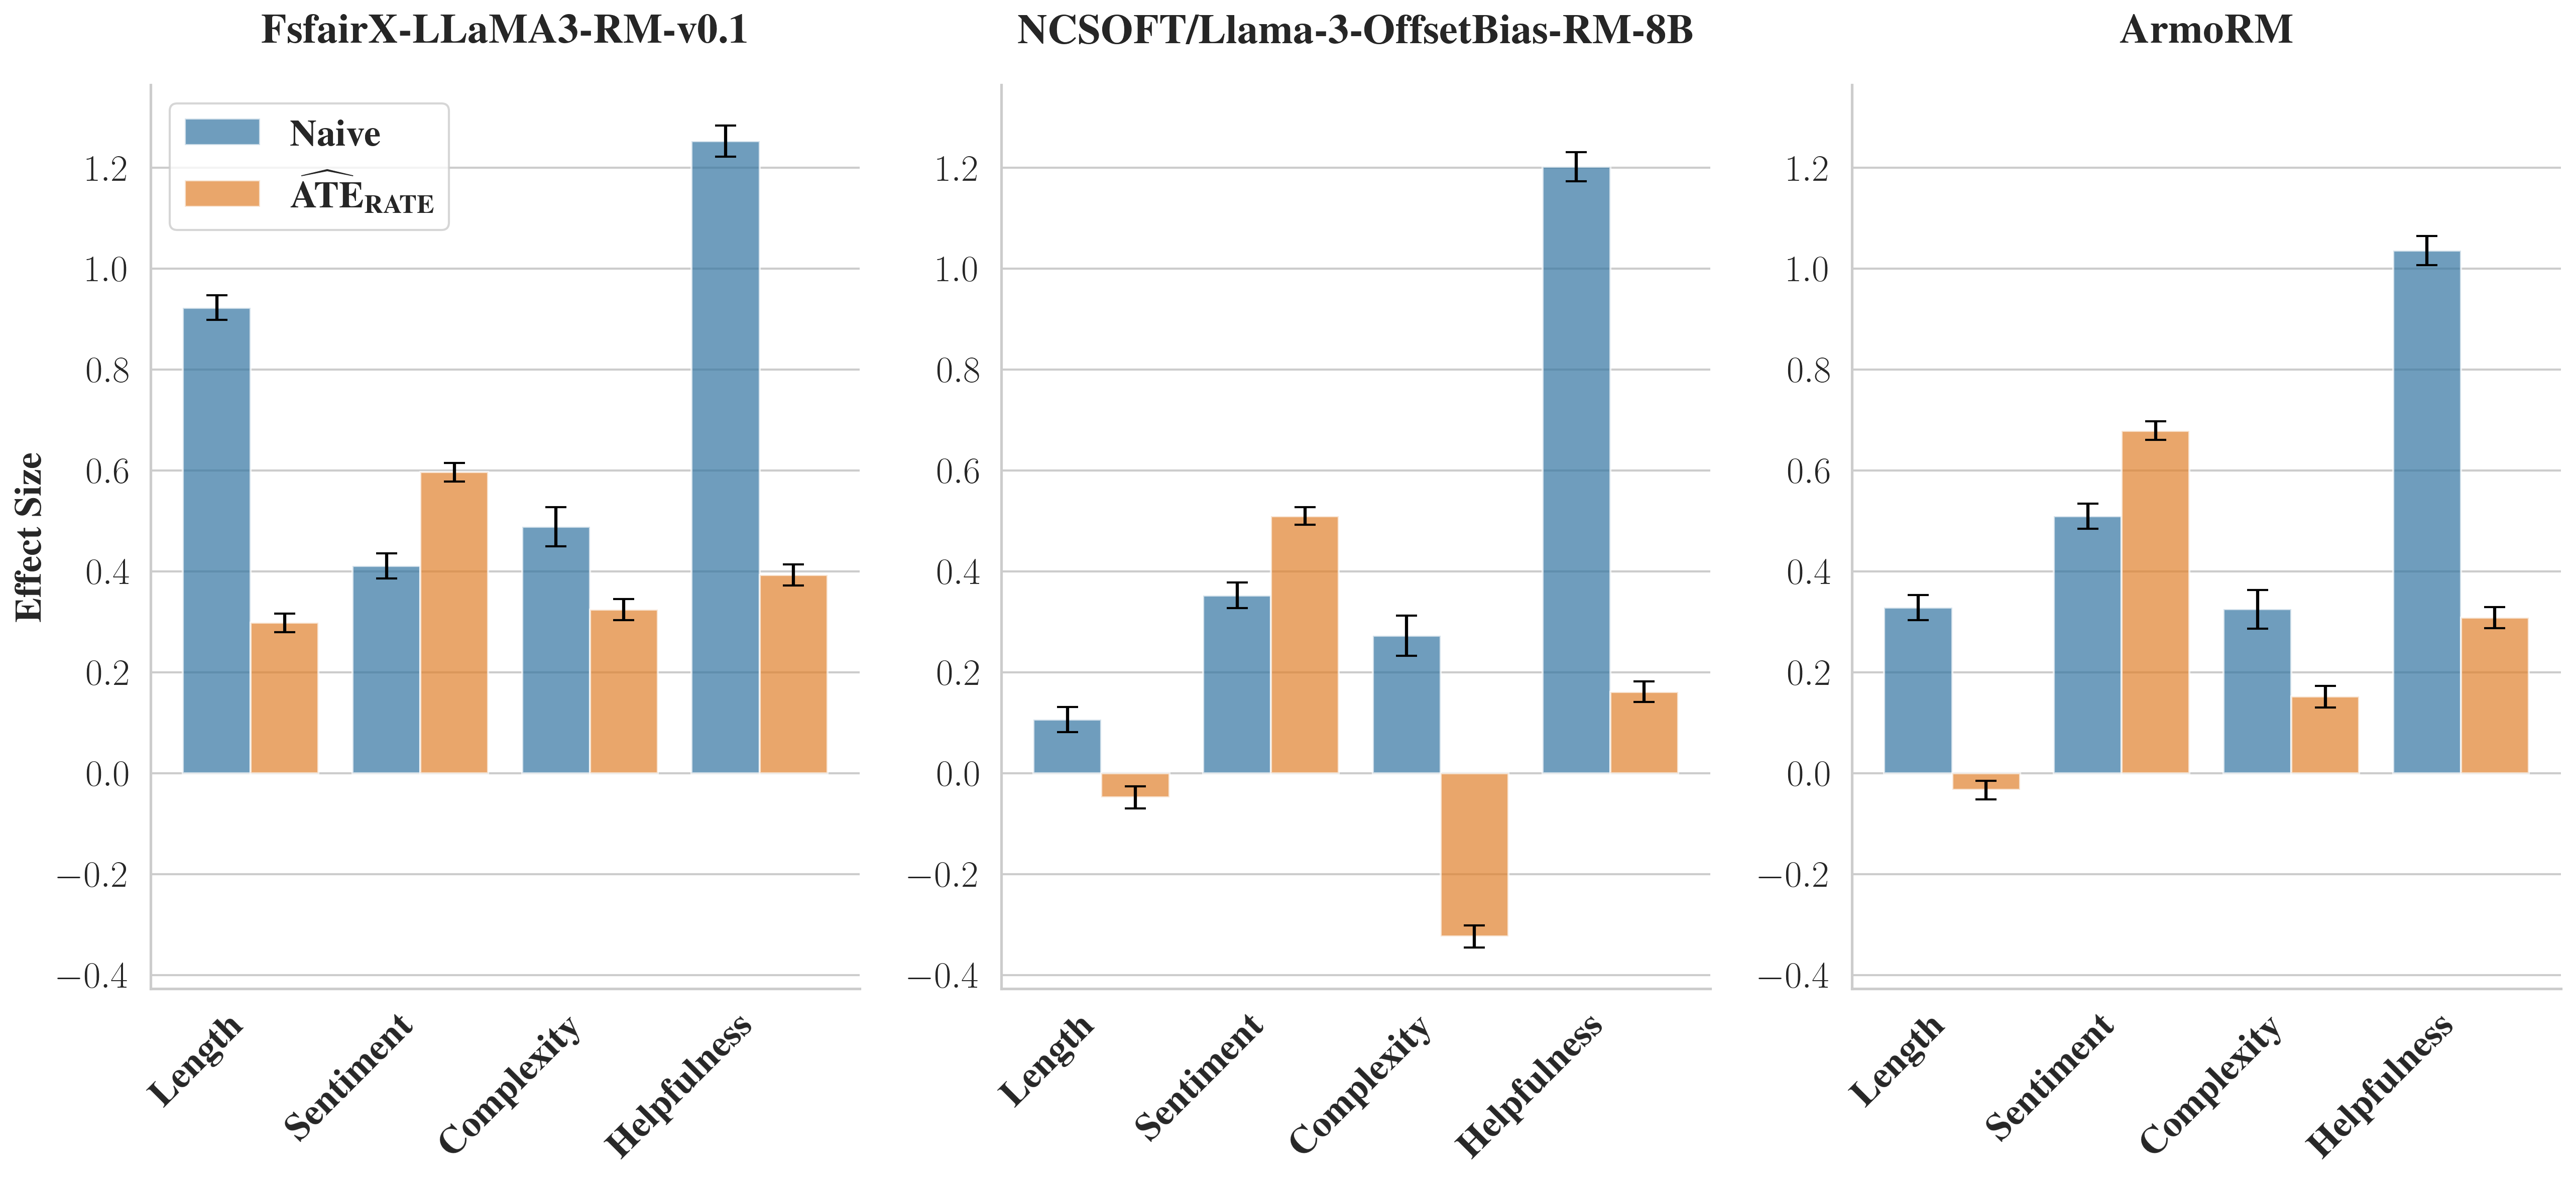

In [5]:
reward_models = ['FsfairX-LLaMA3-RM-v0.1', 'NCSOFT/Llama-3-OffsetBias-RM-8B', 'ArmoRM']
naive_vs_RATE(effects_data, experiment_templates, reward_models)

In [ ]:
effects_data

[{'naive_effect': 0.008119381960269595,
  'naive_effect_stderr': 0.0003128414498368806,
  'ATE_single_rewrite': 0.001494292597008548,
  'ATE_single_rewrite_stderr': 9.391197021986063e-05,
  'ATT_single_rewrite': -0.002639021079802975,
  'ATT_single_rewrite_stderr': 0.00010186583527184842,
  'ATU_single_rewrite': 0.00570200525274725,
  'ATU_single_rewrite_stderr': 0.00014943376492016524,
  'ATE_rewritten_rewrite': -0.0008267120345947232,
  'ATE_rewritten_rewrite_stderr': 0.00023309842563074148,
  'ATT_rewritten_rewrite': 0.0005248629986794456,
  'ATT_rewritten_rewrite_stderr': 0.0003215778627196273,
  'ATU_rewritten_rewrite': -0.002202615200278285,
  'ATU_rewritten_rewrite_stderr': 0.0003354240091955926,
  'reward_std': 0.02474507647406317,
  'Y1_count': 12612,
  'Y0_count': 12389},
 {'naive_effect': 0.11935827661152754,
  'naive_effect_stderr': 0.014139665123064703,
  'ATE_single_rewrite': 0.07064954706499282,
  'ATE_single_rewrite_stderr': 0.00481090758409154,
  'ATT_single_rewrite': 

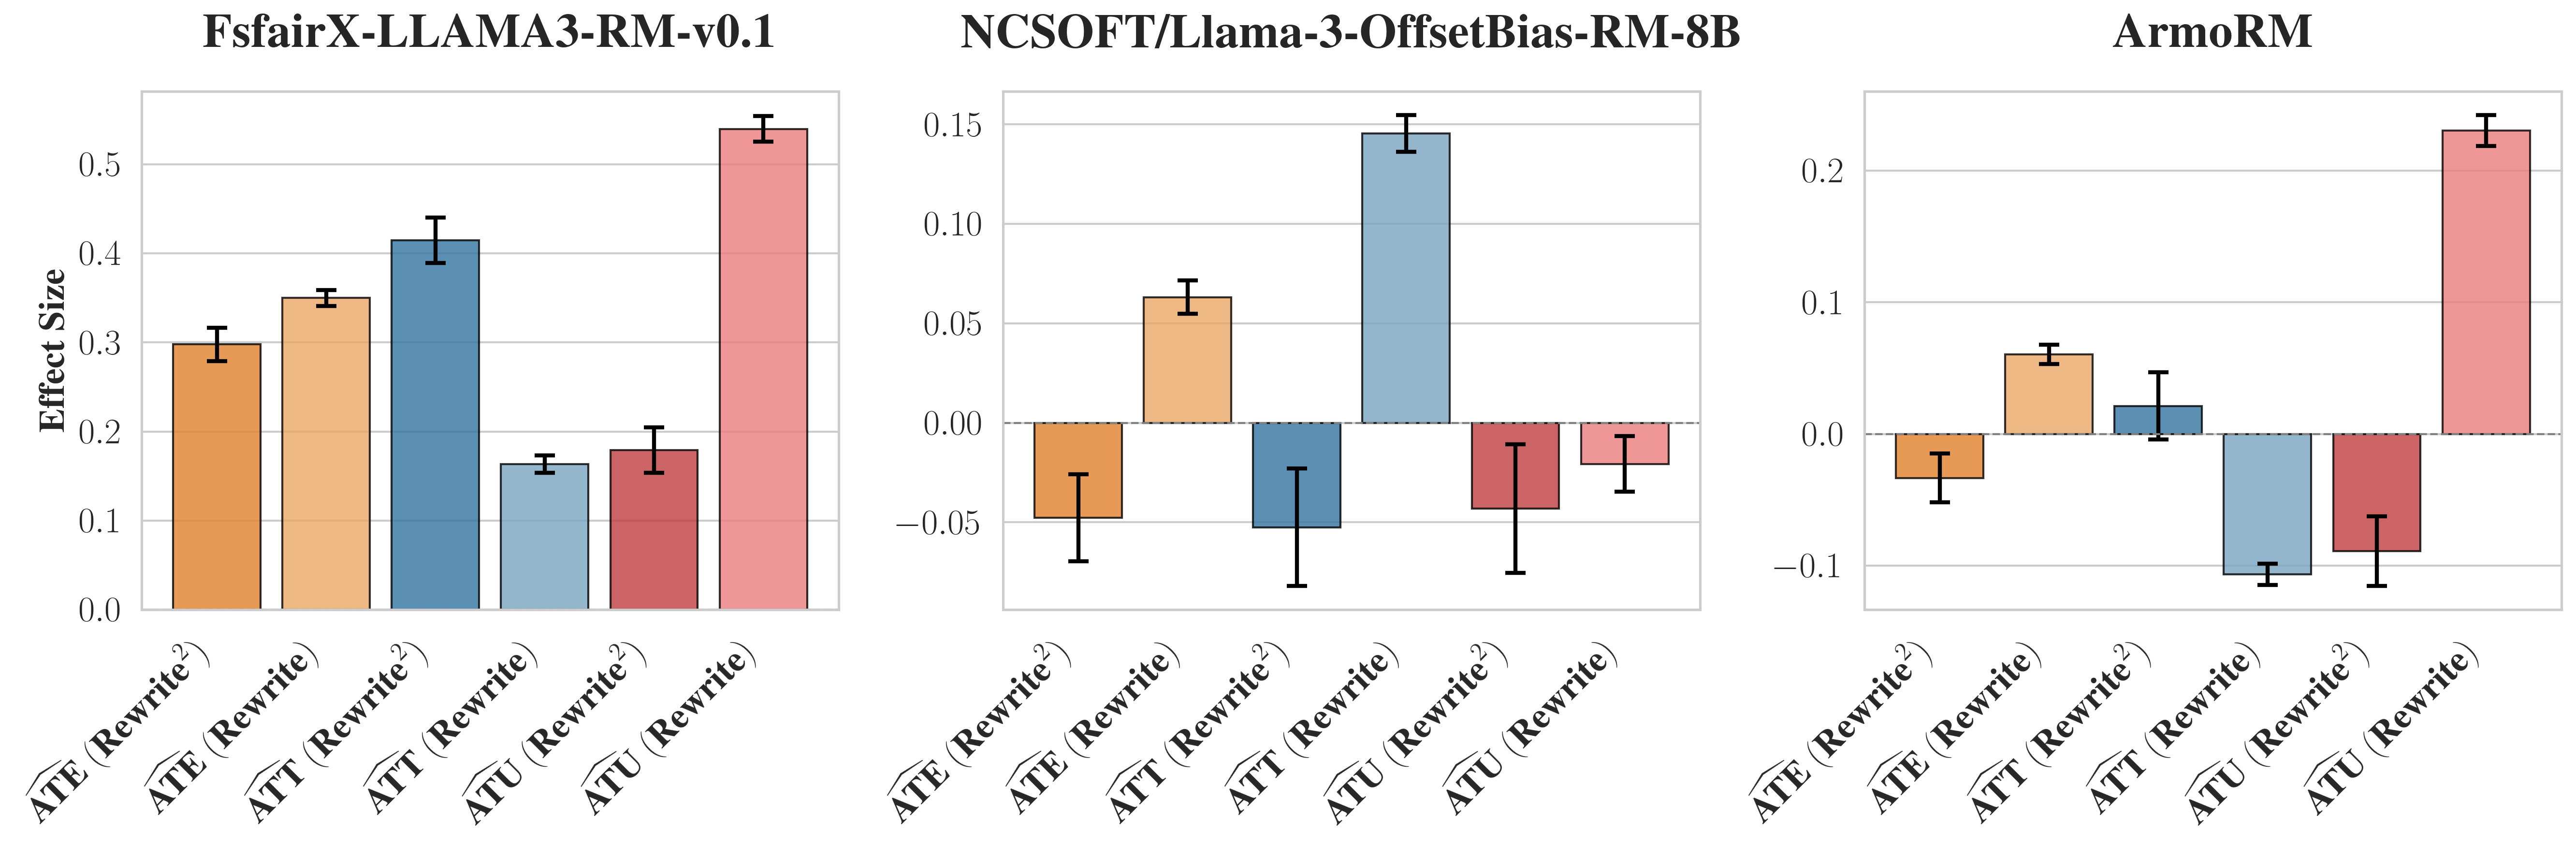

In [7]:
# reverse effects_data[0:3]
reversed_data = effects_data[0:3][::-1]

# Titles for each subplot
titles = [
    "FsfairX-LLAMA3-RM-v0.1",
    "NCSOFT/Llama-3-OffsetBias-RM-8B",
    "ArmoRM"
]
rewrite_bias(reversed_data, titles)

In [8]:
config = load_dataset_from_json(Path("config_plotting_synth.jsonl"))

# make into list of dictionaries
synthetic_templates = [value for value in config.values()]

In [9]:
# save all the data
synthetic_data = []
for effects_template in synthetic_templates:
    dataset_filename = effects_template["dataset_filename"]
    dataset_filename = Path(dataset_filename)
    dataset = load_dataset_from_json(SCORED_DIR / "synthetic" / "positive_long" / dataset_filename)
    effects = treatment_effects_pipeline(dataset, **effects_template)
    synthetic_data.append(effects)

2025-01-10 18:49:57,288 - INFO - Number of w=1 examples: 4004
2025-01-10 18:49:57,308 - INFO - Number of w=0 examples: 5372
2025-01-10 18:49:57,313 - INFO - Treatment effects: {   'ATE_rewritten_rewrite': 0.0844035465969567,
    'ATE_rewritten_rewrite_stderr': 0.04930379836414409,
    'ATE_single_rewrite': 0.16884899790376523,
    'ATE_single_rewrite_stderr': 0.01354892736882799,
    'ATT_rewritten_rewrite': 0.2384955123230651,
    'ATT_rewritten_rewrite_stderr': 0.06947906261246611,
    'ATT_single_rewrite': -0.330754465871043,
    'ATT_single_rewrite_stderr': 0.01630709816868453,
    'ATU_rewritten_rewrite': -0.0304483206344911,
    'ATU_rewritten_rewrite_stderr': 0.0685568950220651,
    'ATU_single_rewrite': 0.5412265610002531,
    'ATU_single_rewrite_stderr': 0.01873701381382012,
    'Y0_count': 5372,
    'Y1_count': 4004,
    'naive_effect': -0.2572232905938362,
    'naive_effect_stderr': 0.06290409599455854,
    'reward_std': 3.068588378397191}
2025-01-10 18:49:57,314 - INFO - Ca

In [10]:
config = load_dataset_from_json(Path("config_plotting_help_synth.jsonl"))

# make into list of dictionaries
help_synthetic_templates = [value for value in config.values()]

In [11]:
# save all the data
help_synthetic_data = []
for effects_template in help_synthetic_templates:
    dataset_filename = effects_template["dataset_filename"]
    dataset_filename = Path(dataset_filename)
    dataset = load_dataset_from_json(SCORED_DIR / "synthetic_helpsteer" / dataset_filename)
    effects = treatment_effects_pipeline(dataset, **effects_template)
    help_synthetic_data.append(effects)

2025-01-10 18:50:00,940 - INFO - Number of w=1 examples: 2574
2025-01-10 18:50:00,941 - INFO - Number of w=0 examples: 2574
2025-01-10 18:50:00,944 - INFO - Treatment effects: {   'ATE_rewritten_rewrite': 0.014393984818637143,
    'ATE_rewritten_rewrite_stderr': 0.00079378864033712,
    'ATE_single_rewrite': 0.01957111698185457,
    'ATE_single_rewrite_stderr': 0.0005043422673346951,
    'ATT_rewritten_rewrite': 0.0054083771461102825,
    'ATT_rewritten_rewrite_stderr': 0.0011309362696518663,
    'ATT_single_rewrite': 0.04116395636899113,
    'ATT_single_rewrite_stderr': 0.0006486281561102675,
    'ATU_rewritten_rewrite': 0.02337959249116403,
    'ATU_rewritten_rewrite_stderr': 0.0010911649065769267,
    'ATU_single_rewrite': -0.002021722405281992,
    'ATU_single_rewrite_stderr': 0.00048425794318990095,
    'Y0_count': 2574,
    'Y1_count': 2574,
    'naive_effect': 0.031895498183147755,
    'naive_effect_stderr': 0.000981691571743384,
    'reward_std': 0.03521797135263725}
2025-01-10

Slope of $\widehat{\textbf{ATE}}\ (\textbf{Rewrite}^2)$: 0.04676868149957367
Slope of $\widehat{\textbf{ATE}}\ (\textbf{Rewrite})$: -0.10007485133004765
Slope of $\widehat{\textbf{ATE}}\ (\textbf{Rewrite}^2)$: -0.011395818249528256
Slope of $\widehat{\textbf{ATE}}\ (\textbf{Rewrite})$: -0.041311543802865024


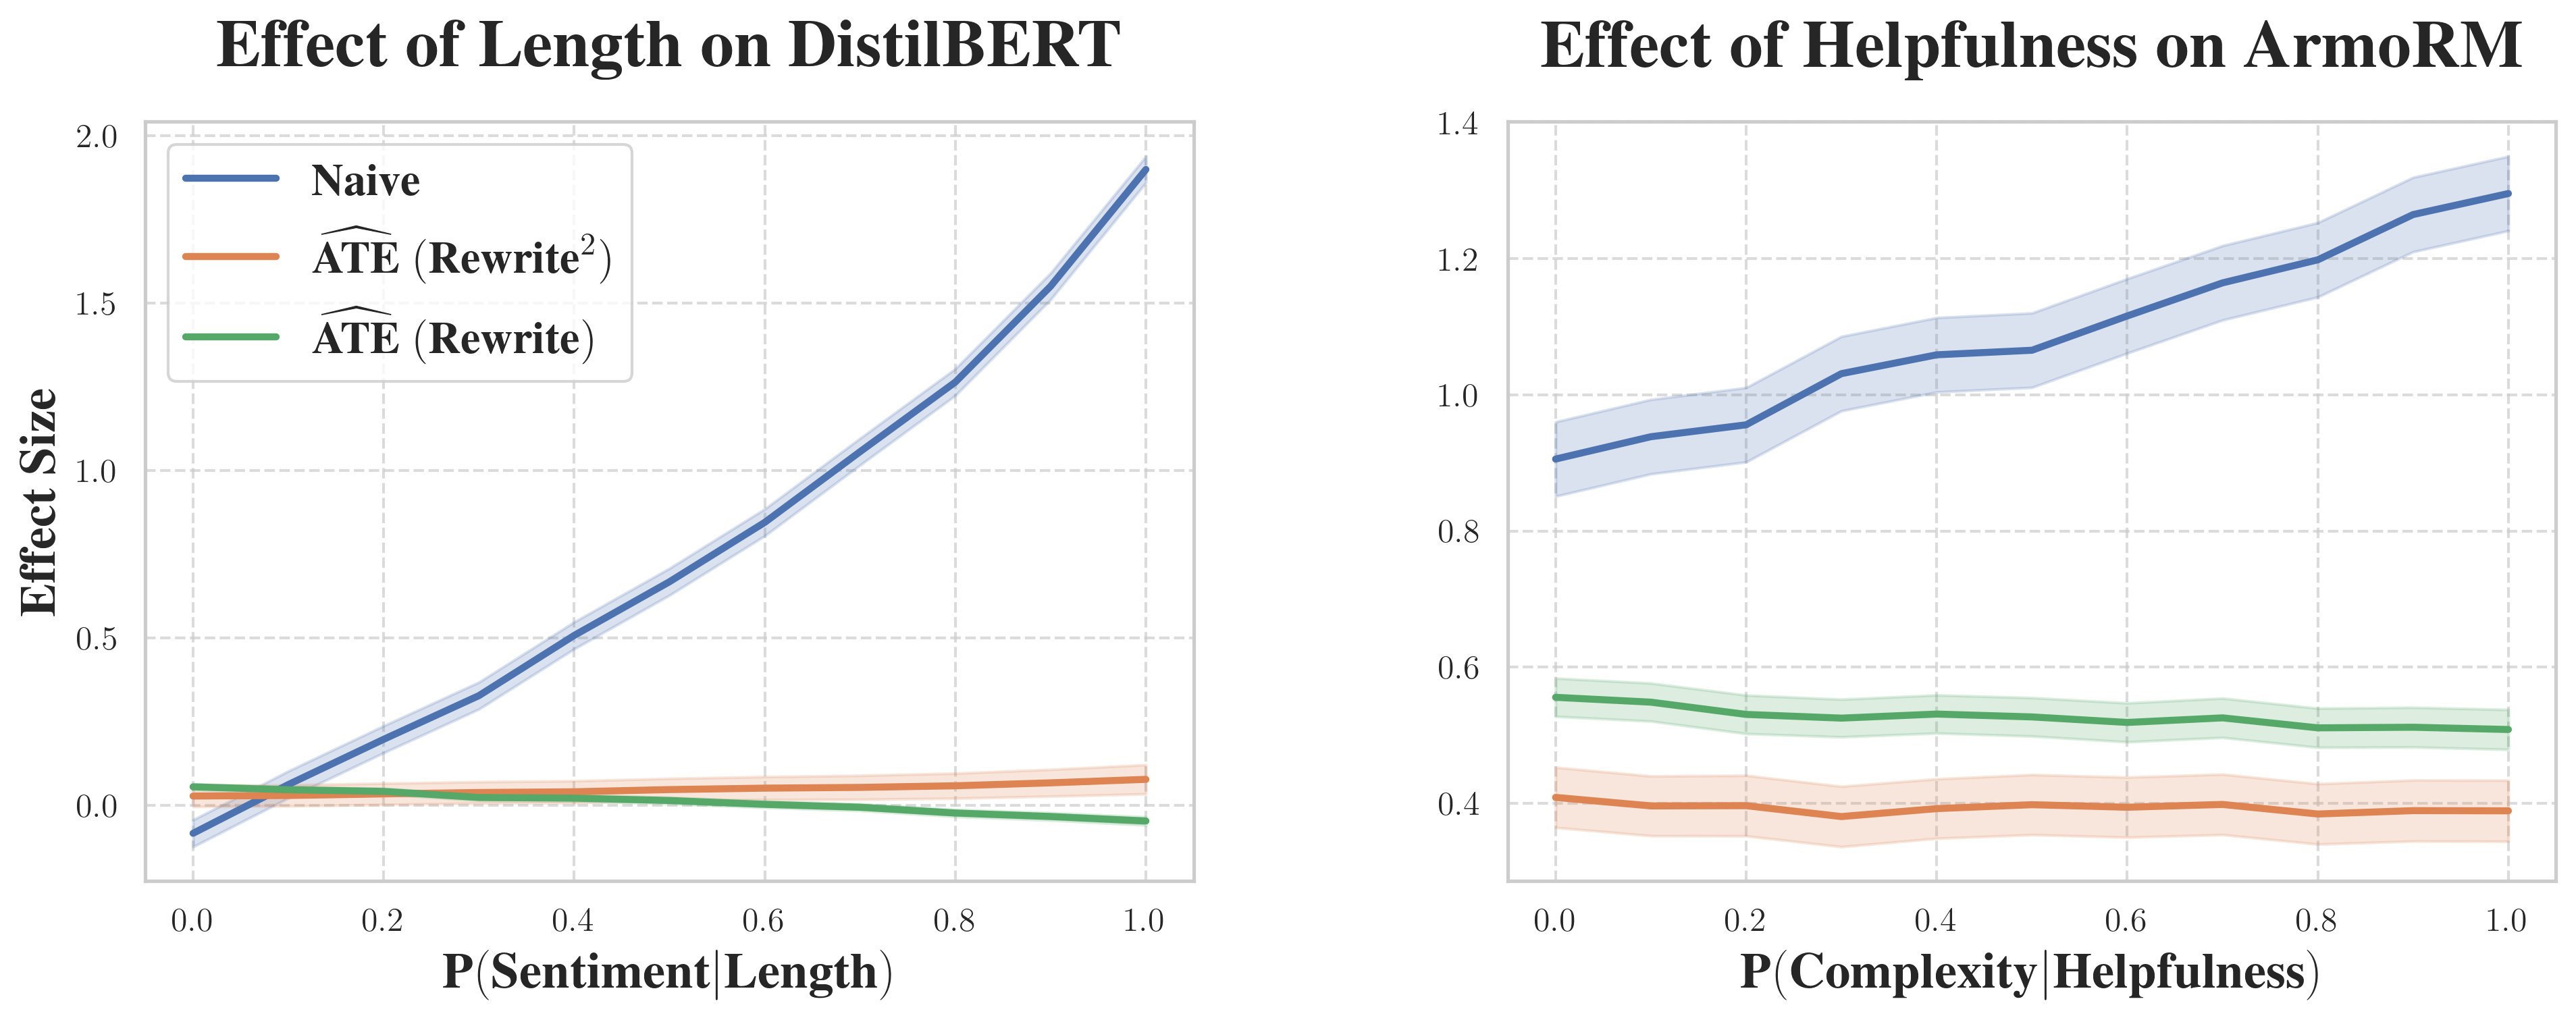

In [12]:
synthetic_subplots(synthetic_data, synthetic_templates, "Length", "Sentiment",
          help_synthetic_data, help_synthetic_templates, "Helpfulness", "Complexity")

Next we compare the RATE ATT vs ATU estimates for a particular tuple, also normalized.

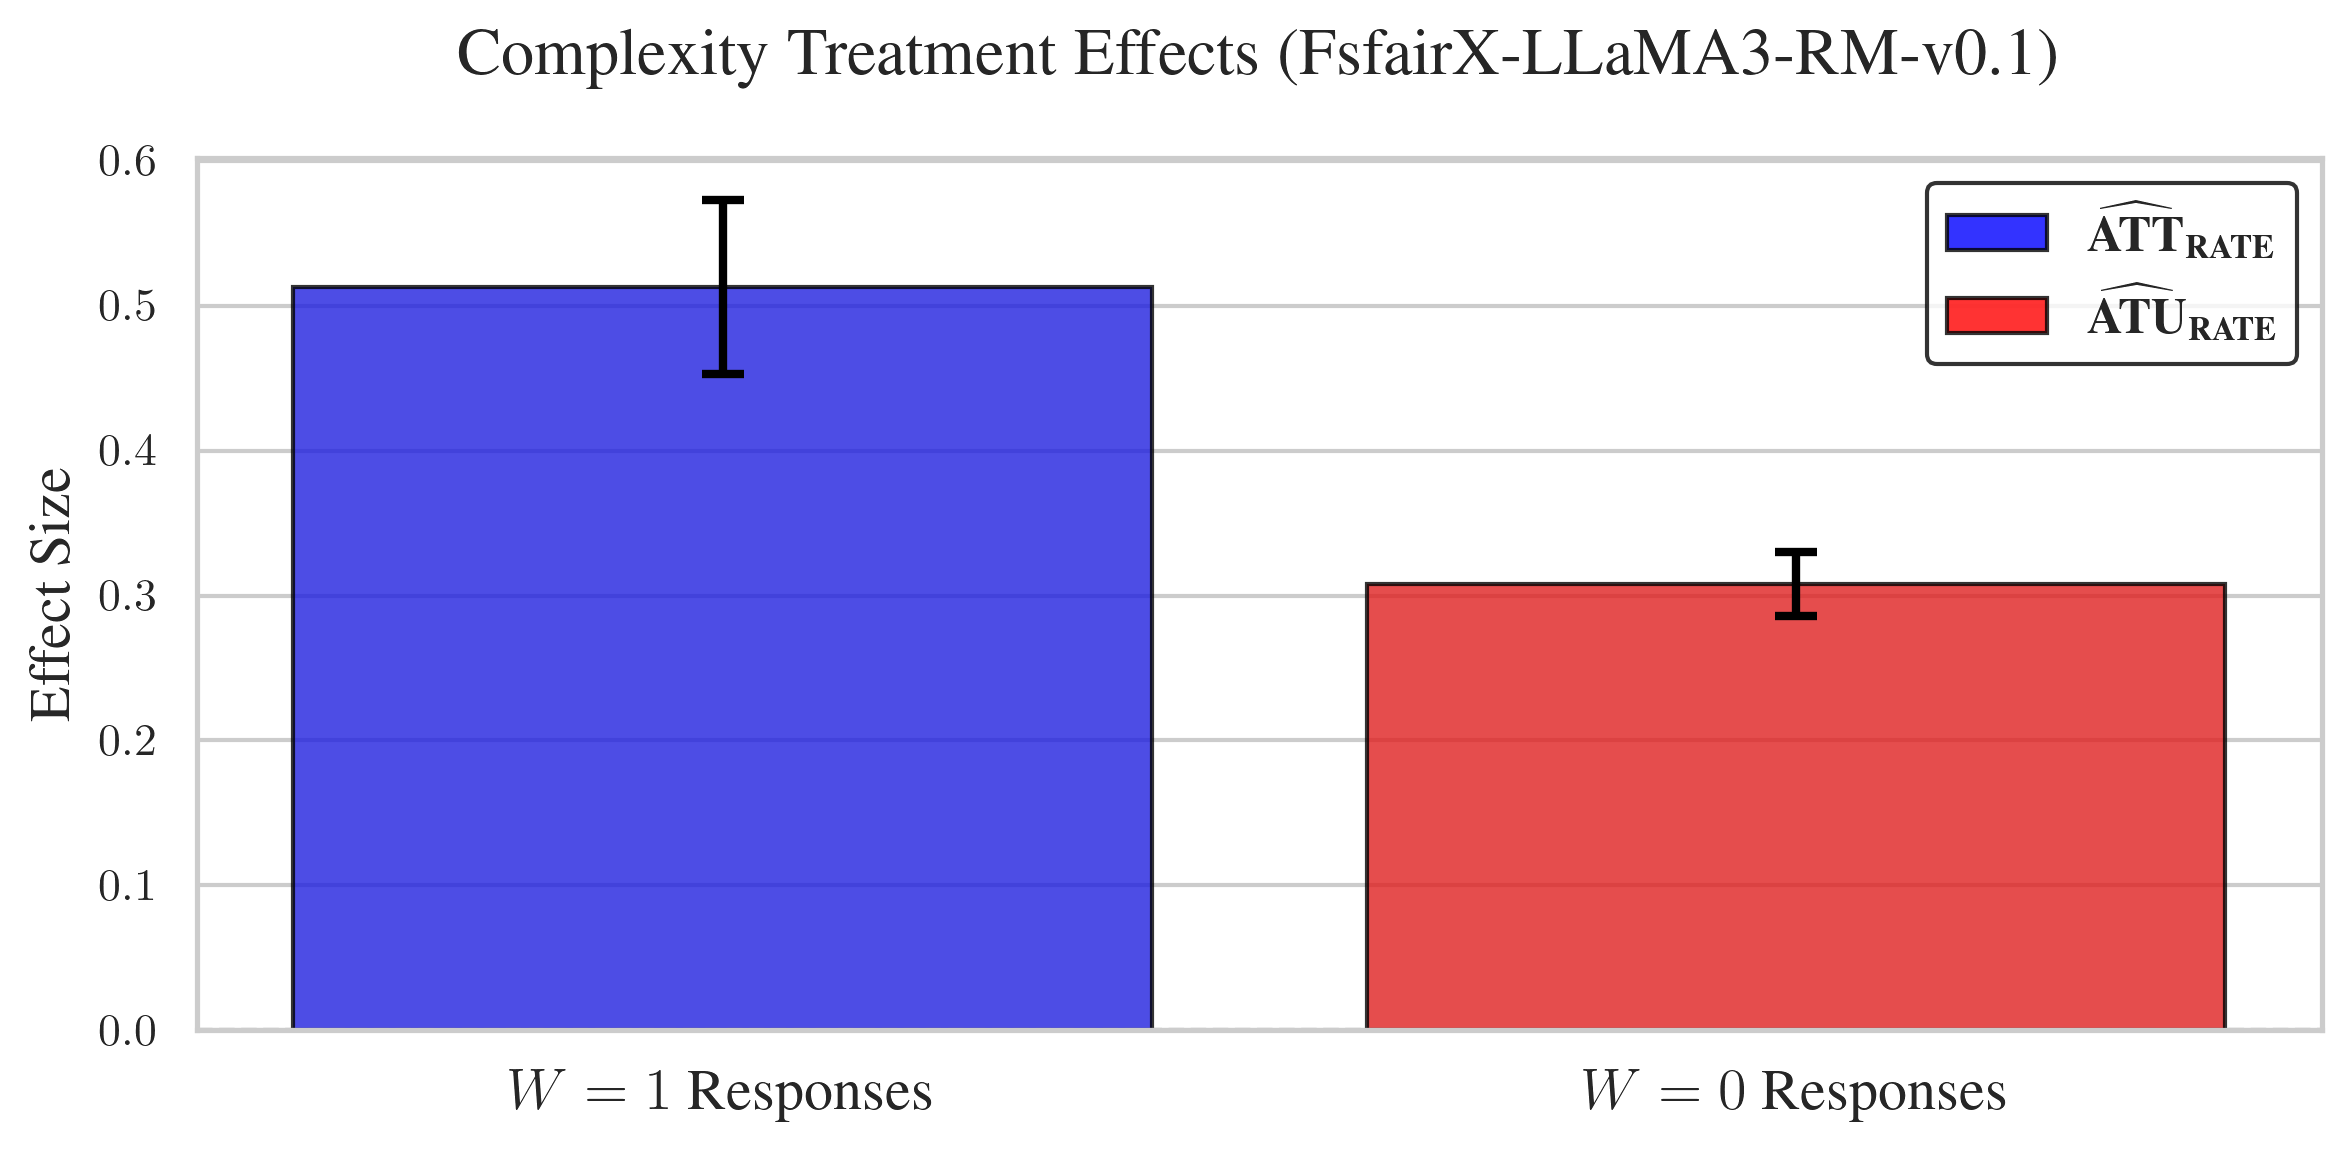

In [13]:
model_name = "FsfairX-LLaMA3-RM-v0.1"
att_atu(effects_data[8], effects_data[8]['reward_std'], model_name)